<a href="https://colab.research.google.com/github/ahvblackwelltech/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Ahvi_Blackwell_LS_DSPT4_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [0]:
# 1) Write Function
def prob_drunk_given_positive(prob_drunk_prior, prob_positive_drunk, prob_positive):
  return (prob_drunk_prior * prob_positive_drunk) / prob_positive

In [23]:
prob_drunk_given_positive(0.001, 1, 0.08)

0.0125

In [24]:
prob_drunk_given_positive(0.001, 0.8, 1)

0.0008

In [0]:
# 2) Explore scipy.stats.bayes_mvs
%matplotlib inline

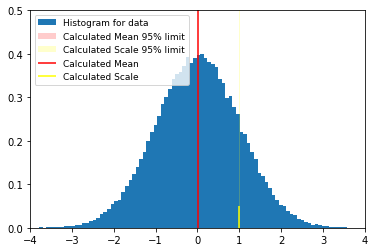

In [26]:
data = [6, 9, 12, 7, 8, 8, 13]
mean, vrbl, std = stats.bayes_mvs(data)

r_samps = 100000
data = stats.norm.rvs(size=r_samps)
mean, vrbl, std = stats.bayes_mvs(data, alpha=0.95)

# Histogram For Data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram for data')
ax.vlines(mean.statistic, 0, 0.5, color='red', label='Calculated Mean')
ax.axvspan(mean.minmax[0], mean.minmax[1], facecolor='red', alpha=0.2, 
           label=r'Calculated Mean 95% limit')
ax.vlines(std.statistic, 0, 0.05, color='yellow', label='Calculated Scale')
ax.axvspan(std.minmax[0], std.minmax[1], facecolor='yellow', alpha=0.2, 
           label=r'Calculated Scale 95% limit')

ax.legend(fontsize=9)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show();

In [27]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [0]:
# Confidence Interval Function
def confidence_interval(data, confidence=0.95):
  mean = sum(data) / len(data)
  data = np.array(data)
  stddv = stats.sem(data)
  intrvl =  stddv * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
  return mean, mean - intrvl, mean + intrvl

In [29]:
### Must Simplify Variable Names
votes_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
cols = ['party','handicapped-infants','water-project','budget',
        'physician-fee-freeze', 'el-salvador-aid','religious-groups',
        'anti-satellite-ban', 'aid-to-contras','mx-missile','immigration',
        'synfuels', 'education', 'right-to-sue','crime','duty-free',
        'south-africa']

df = pd.read_csv(votes_url, header=None, names=cols, na_values='?')
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace({'n':0, 'y':1})
df.isnull().sum()
df = df.fillna(method='ffill')

In [31]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [0]:
budget = df[['synfuels', 'budget']].dropna()
budget = budget.set_index(budget.synfuels)
budget = budget['budget']

In [33]:
budget.shape

(434,)

In [34]:
budget.count()

434

In [35]:
ttest_confidence = confidence_interval(budget, confidence=0.99)
print(ttest_confidence)
ttest_confidence[0]

(0.5875576036866359, 0.5263510162840735, 0.6487641910891982)


0.5875576036866359

In [36]:
bayes_mean, bayes_var, bayes_std = stats.bayes_mvs(budget)
bayes_mean

Mean(statistic=0.5875576036866359, minmax=(0.5485615781099664, 0.6265536292633053))

In [37]:
bayes_var

Variance(statistic=0.24402044329444975, minmax=(0.21796812697195475, 0.27263874769752217))

In [38]:
bayes_std

Std_dev(statistic=0.49369780364794724, minmax=(0.4668705676865428, 0.5221482047249824))

# My Summary

In [0]:
# 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!